In [2]:
# import packages

import seaborn as sns
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from pathlib import Path
from mlxtend.frequent_patterns import apriori, fpgrowth
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [3]:
# set file location

file_loc = Path("titanic.csv")
print("file location exists:", file_loc.exists())

file location exists: True


In [4]:
# import dataset 

df = pd.read_csv(file_loc)
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# find out number of rows and columns

df.shape

(891, 16)

In [6]:
# find null values

nulls = df.isnull().sum()
print("These are the features with null values, and the count of null values in each.")
nulls[nulls > 0]

These are the features with null values, and the count of null values in each.


age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [7]:
# Impute missing 'age' values based on another ('who') column, and check

category_means = df.groupby('who')['age'].transform('mean')
df1 = df
df1["age"].fillna(category_means, inplace=True)
df1[df1['who'] == 'child'].describe()


C:\Users\dkelly26\AppData\Local\Temp\ipykernel_12144\798524042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["age"].fillna(category_means, inplace=True)


,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,430.602410,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795
std,287.079319,0.494757,0.619024,4.729063,1.638592,0.682255,33.466438
min,7.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.225000
25%,171.500000,0.000000,2.000000,2.000000,0.000000,1.000000,15.900000
50%,435.000000,1.000000,3.000000,5.000000,1.000000,1.000000,26.250000
75%,705.500000,1.000000,3.000000,9.500000,3.000000,2.000000,32.193750
max,875.000000,1.000000,3.000000,15.000000,5.000000,2.000000,211.337500


In [8]:
# try a quick association rule to see if there is some pattern to deck = NaN
# first we create a categories dataframe

df_categories = df1.drop(columns=['pclass', 'sibsp', 'parch', 'Unnamed: 0', 'embarked', 'sex', 'age', 'fare', 'alive', 'adult_male'])
df_categories

,survived,class,who,deck,embark_town,alone
0,0,Third,man,NaN,Southampton,False
1,1,First,woman,C,Cherbourg,False
2,1,Third,woman,NaN,Southampton,True
3,1,First,woman,C,Southampton,False
4,0,Third,man,NaN,Southampton,True
...,...,...,...,...,...,...
886,0,Second,man,NaN,Southampton,True
887,1,First,woman,B,Southampton,True
888,0,Third,woman,NaN,Southampton,False
889,1,First,man,C,Cherbourg,True


In [9]:
# then we encode the category columns

codes = cat_encoder.fit_transform(df_categories[['class', 'who', 'deck', 'embark_town']])
names = cat_encoder.get_feature_names_out()
encoded_df = pd.DataFrame(codes.todense(), columns = names)
encoded_df

,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# then we clean things up a bit

df2 = pd.merge(encoded_df, df_categories[['survived', 'alone']], left_index=True, right_index=True)
df2['alone'] = df2['alone'].replace([True, False], [1,0])
df2

C:\Users\dkelly26\AppData\Local\Temp\ipykernel_12144\2585000862.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['alone'] = df2['alone'].replace([True, False], [1,0])


,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,survived,alone
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [11]:
# then we do some association rule mining using apriori and print the results

results = apriori(df2, min_support = .2)
results = results[results['itemsets'].apply(lambda x: len(x)) > 2]
results = results[results['itemsets'].apply(lambda x: not 'deck_nan' in x)]
results

C:\Users\dkelly26\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
23,0.352413,"(2, 4, 13)"
24,0.274972,"(16, 2, 4)"
25,0.295174,"(2, 19, 4)"
26,0.384961,"(16, 2, 13)"
27,0.358025,"(2, 19, 13)"
28,0.260382,"(16, 2, 19)"
29,0.387205,"(16, 4, 13)"
30,0.395062,"(19, 4, 13)"
31,0.360269,"(16, 19, 4)"
32,0.372615,"(16, 19, 13)"


In [12]:
# let's look at a subset of the data we suspect is most closely related to deck = NaN
# we want to filter to: who = man, embark town = southampton, alone = true and class_third = true
# we want the resulting table to just show the counts of each variable after filtering

df2[(df2['who_man'] == True)].sum()

class_First                119.0
class_Second                99.0
class_Third                319.0
who_child                    0.0
who_man                    537.0
who_woman                    0.0
deck_A                      13.0
deck_B                      19.0
deck_C                      31.0
deck_D                      15.0
deck_E                      16.0
deck_F                       5.0
deck_G                       0.0
deck_nan                   438.0
embark_town_Cherbourg       90.0
embark_town_Queenstown      37.0
embark_town_Southampton    410.0
embark_town_nan              0.0
survived                    88.0
alone                      410.0
dtype: float64

In [13]:
# join df1 and df2 for analysis like clustering, correlation, and pca

df3 = pd.concat([df1[['age', 'fare']], df2], axis=1)
df3

,age,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,...,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,survived,alone
0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,38.0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
2,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,35.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
887,19.0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
888,32.0,23.4500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
889,26.0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [14]:
# normalize age and fare, so they don't bias our clustering and correlation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['age'] = scaler.fit_transform(df3['age'].values.reshape(-1, 1))
df3['fare'] = scaler.fit_transform(df3['fare'].values.reshape(-1, 1))
df3

,age,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,...,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,survived,alone
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,0.472229,0.139136,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
2,0.321438,0.015469,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,0.434531,0.103644,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
887,0.233476,0.058556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
888,0.396833,0.045771,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [15]:
print(df3.columns)

Index(['age', 'fare', 'class_First', 'class_Second', 'class_Third',
       'who_child', 'who_man', 'who_woman', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_nan',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_nan', 'survived', 'alone'],
      dtype='object')


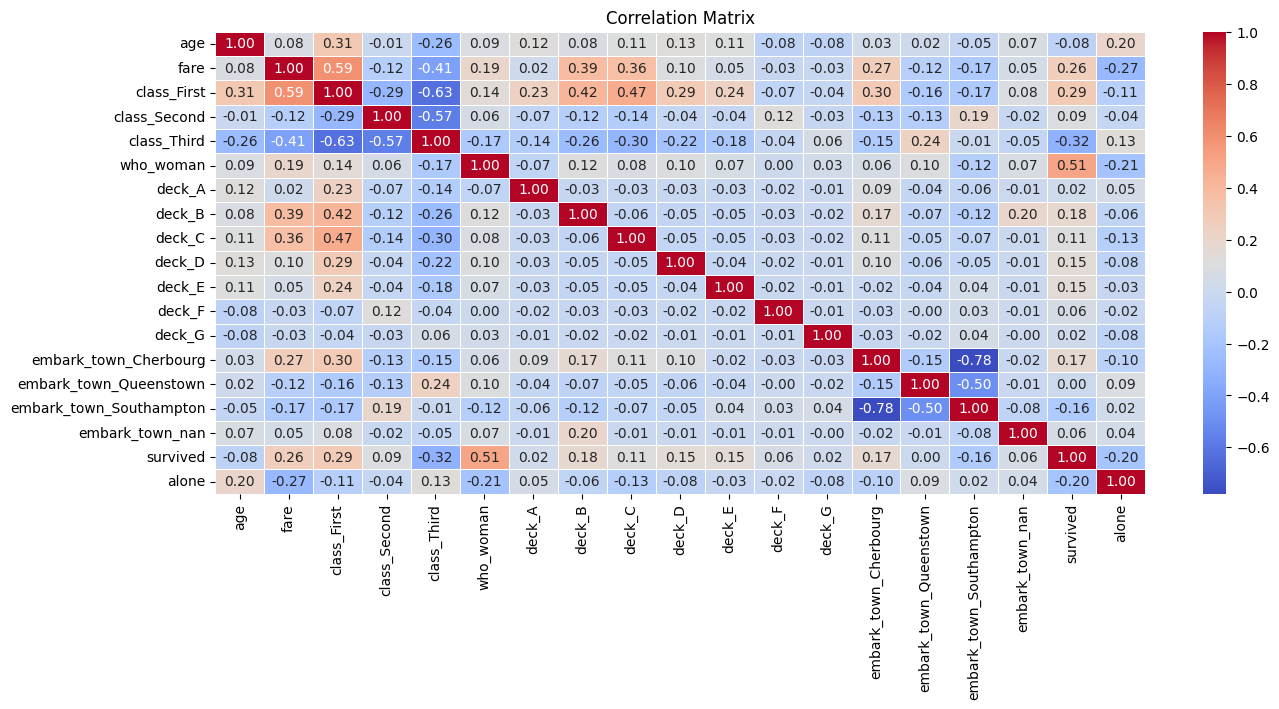

In [16]:
# discover correlations
 
# kind of silly to have deck_nan if we have the Deck A-G columns, so we can drop that
# Likewise, we can drop one either the female or male category
# Finally, "who_child" is redundant as long as we have "age"
df3 = df3.drop(columns=["deck_nan", "who_man", "who_child"])

corr_matrix = df3.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()